In [10]:
import os 
import random
import numpy as np
import pandas as pd
import importlib as imp
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.simplefilter('ignore')
pd.options.display.max_columns = 100


Ваша последняя лабораторная работа будет заключаться в реализации одного из двух алгоритмов, <br>подсказанных природой, для решении задачи vehicle routing problem:

1) Алгоритм колонии муравьев
2) Алгоритм колонии пчел

Данные:

Прикрепил в архиве. Формат такой:<br>
1-6 строчки - доп. информация про бенчмарку, No of trucks - количество грузовиков, CAPACITY - вместимость грузовика.<br>
7 строчка NODE_COORD_SECTION - начало данных про пункты<br>
1 17 36 - 1 пункт, координата по x - 17, координата по y - 36<br>
...<br>
Строчка DEMAND_SECTION - начало информации про требуемое количество материала для пункта<br>
7 9 - 7 пункт, 9 - требуемое количество материала. Если требуется 0 - этот пункт склад.<br>

Формат выходных данных, которые нужно выслать по каждой бенчмарке - приложил как файл B-n78-k10.sol в архиве.<br>

Дедлайн: 07.06.2020 23:59<br>

#### Ant
https://github.com/ustcldf/ACS-VRP <br>
https://github.com/afurculita/VehicleRoutingProblem/tree/master/src/ro/uaic/info/acs<br>
https://github.com/pkonowrocki/CVRP_ACO/blob/master/ACO_CVRP.py<br>
https://github.com/bsmdev/ant_colony<br>
#### Bee
https://github.com/JoyceWufm/Artificial-bee-colony-algorithm-for-vehicle-routing-problem/ <br>
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.457.8027&rep=rep1&type=pdf

In [139]:
from utils import tools, visualize, common
problem = tools.get_problem('benchmarks/B/B-n64-k9.vrp')

n_trucks -> 9
optimal -> 861
capacity -> 100
n_locations -> 64
depot_i -> 0
demands -> [0.0, 24.0, 15.0, 2.0, 3.0, 24.0, 17.0, 9.0, 4.0, 2.0, 15.0, 20.0, 17.0, 15.0, 20.0, 8.0, 6.0, 2.0, 6.0, 18.0, 5.0, 16.0, 2.0, 18.0, 1.0, 13.0, 17.0, 5.0, 14.0, 19.0, 3.0, 22.0, 6.0, 9.0, 22.0, 6.0, 18.0, 23.0, 24.0, 4.0, 20.0, 16.0, 15.0, 24.0, 16.0, 9.0, 4.0, 11.0, 3.0, 54.0, 36.0, 19.0, 11.0, 21.0, 12.0, 9.0, 17.0, 16.0, 14.0, 14.0, 21.0, 19.0, 6.0, 17.0]


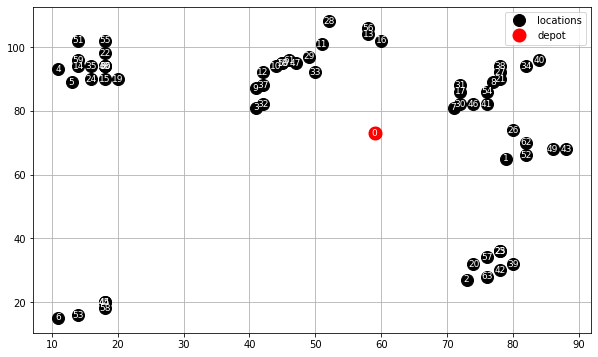

In [157]:
tools     = imp.reload(tools)
visualize = imp.reload(visualize)
common    = imp.reload(common)

visualize.visualize_problem(problem)
for k, v in problem.items():
    if k !='locations' and k !='dists':
        print(k,"->", v)

In [158]:
common   = imp.reload(common)
solution = common.generate_solution(problem, verbose=False)
solution

array([ 0, 14,  4, 22, 48, 18, 21, 40, 27, 38,  0, 19, 36, 60, 12, 28,  0,
       20, 53, 44, 58,  6, 45,  0, 54,  8, 62, 56, 34, 11, 33, 31,  0, 49,
       32, 51, 15, 24,  0, 17, 16, 10, 29, 50, 61,  0, 57, 42, 63,  2, 39,
       25, 23,  0, 30, 46,  1,  7, 26, 41, 43, 52,  0,  5, 35, 59, 55,  3,
       47, 13,  9, 37,  0])

In [159]:
common.check_solution(problem, solution, verbose=True)

Route demand 112.0 exeeds capacity 100
Route  [99.0, 88.0, 82.0, 112.0, 88.0, 97.0, 98.0, 108.0, 106.0]


False

In [160]:
sol_cost = common.compute_solution(problem, solution)
sol_cost

1358.3634

In [161]:
from algorithm import local_search
local_search = imp.reload(local_search)

alg = local_search.LocalSearch(problem)
alg.set_params(solution, n_iter=500, k=2)
new_sol, new_cost = alg.solve(verbose=True)
common.check_solution(problem, new_sol, verbose=True)
new_cost

527it [00:00, 14196.61it/s]

Start cost: 1358.3634033203125
Several depots in a row: [0, 1, 16, 26, 38, 39, 45, 53, 60, 72]


1044.6595

In [162]:
new_cost = common.compute_solution(problem, new_sol)
print('Alg cost {}'.format(new_cost))
print('Optimal cost {}'.format(problem['optimal']))
new_sol

Alg cost 1044.6595458984375
Optimal cost 861


array([ 0,  0, 49, 62, 43,  7,  3, 19, 15,  5, 14,  4, 22, 60, 12, 28,  0,
       20, 53, 44, 58,  6, 45, 32, 10, 18,  0, 34, 40, 27,  8, 54, 56, 11,
       33, 41, 21, 38,  0,  0, 17, 16, 29, 50, 61,  0, 57, 42, 63,  2, 39,
       25, 23,  0, 30, 46, 31,  1, 52, 26,  0, 47, 13, 48, 35, 59, 55, 51,
       36, 24,  9, 37,  0])

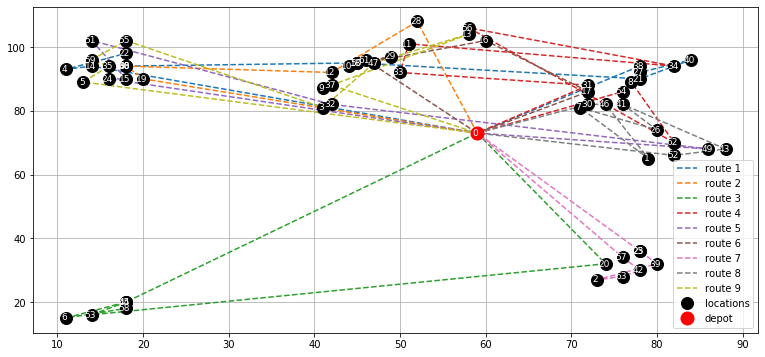

In [163]:
visualize = imp.reload(visualize)
visualize.visualize_problem(problem, solution, figsize=(13,6))

[]
[]
[]
[23 17 30  7  8 26 28 16 18 25  3 15 19 27 20  2 10 14  1 24 11  6 13 21
 22  4 29 12  9  5]
[]


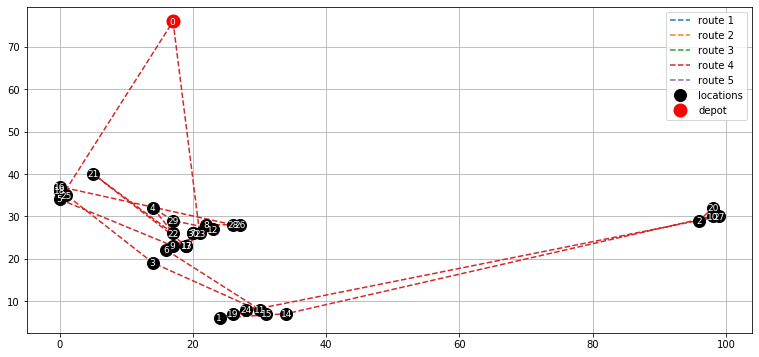

In [138]:
visualize.visualize_problem(problem, new_sol, figsize=(13,6))
depots = list(filter(lambda i: new_sol[i]==0, range(len(new_sol))))
for i, d in  enumerate(depots[:-1]):
    route = new_sol[depots[i]+1:depots[i+1]]
    print(route)